<a href="https://colab.research.google.com/github/Ashwini5737/Sales-Forecasting/blob/main/R_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Store Sales Forecasting Data Overview**

  In this dataset, you will predict sales for various product families sold at Favorita stores in Ecuador. The training data includes dates, store and product information, promotions, and sales figures. Several supplementary files provide additional context to enhance model building.

  **Dataset Files and Descriptions:**

  *train.csv:* Contains time series data with the following fields:

  *store_nbr:* Identifier for the store.

  *family:* Type of product sold.

  *sales:* Total sales for a product family at a store on a given date, including fractional values.

  *onpromotion:* Number of items in a product family that were on promotion.

  *stores.csv:* Metadata about stores, including city, state, type, and cluster.

  *oil.csv:* Daily oil prices, significant due to Ecuador's dependency on oil.

  *holidays_events.csv:* Information on holidays and events, including:


  *   transferred: Indicates if a holiday was officially moved to another date.
  *   Types of days include Bridge (extra day off) and Work Day (compensatory working day).
  *   Additional holidays for events like Christmas.

**Set the computational backend engine for deep learning to Theano in R.**

In [ ]:
backend_engine <- "theano"  # Change this to "theano" or "cntk" if desired

**Install and load required packages, and set Keras backend to Theano.**


In [ ]:
if (!require(e1071)) {
  install.packages("e1071")
}
if (!require(randomForest)){
  install.packages('randomForest')
}
if(!require(forecast)){
  install.packages('forecast')
}

install.packages("reticulate")
if(!require(keras)){
  install.packages('keras')
}
if(!require(tensorflow)){
  install.packages('tensorflow')
}

if(!require(xgboost)){
  install.packages('xgboost')
}

if(!require(DataExplorer)){
  install.packages("DataExplorer")
}

if(!require(mlflow)){
  install.packages("mlflow")
}

if(!require(mlr3)){
  install.packages("mlr3")
}

Loading required package: e1071

Loading required package: randomForest

randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ranger’:

    importance


Loading required package: forecast

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: keras

Loading required package: tensorflow

Loading required package: xgboost

Loading required package: DataExplorer

Loading required package: mlflow

Loading required package: mlr3



In [ ]:
# Install all required packages
Sys.setenv(KERAS_BACKEND = backend_engine)
library(dplyr)
library(tidyr)
library(readr)
library(randomForest)
library(e1071)
library(reticulate)
library(forecast)
library(xgboost)
library(keras)
library(tensorflow)
library(mlr3)
library(DataExplorer)
library(mlflow)


Attaching package: ‘dplyr’


The following object is masked from ‘package:xgboost’:

    slice


The following object is masked from ‘package:randomForest’:

    combine


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
# Set MLFLOW_TRACKING_URI environment variable
MLFLOW_TRACKING_URI <- "https://dagshub.com/ashwini.patil5737/Store_Sales_Forecasting_In_R.mlflow"
Sys.setenv(MLFLOW_TRACKING_URI = MLFLOW_TRACKING_URI)

# Set MLFLOW_TRACKING_USERNAME environment variable
MLFLOW_TRACKING_USERNAME <- "ashwini.patil5737"
Sys.setenv(MLFLOW_TRACKING_USERNAME = MLFLOW_TRACKING_USERNAME)

# Set MLFLOW_TRACKING_PASSWORD environment variable
MLFLOW_TRACKING_PASSWORD <- "c41bb41975f338e49f5ca38a6840cffe92696fb9"
Sys.setenv(MLFLOW_TRACKING_PASSWORD = MLFLOW_TRACKING_PASSWORD)


In [ ]:
# Set tracking URI if using a remote server
# mlflow_end_run()
mlflow_start_run()

Warning message:
“`as_integer()` is deprecated as of rlang 0.4.0
Please use `vctrs::vec_cast()` instead.
This warning is displayed once every 8 hours.”


lifecycle_stage status  start_time         
1 active          RUNNING 2024-12-10 05:25:46
2 active          RUNNING 2024-12-10 05:25:46
3 active          RUNNING 2024-12-10 05:25:46
4 active          RUNNING 2024-12-10 05:25:46
  artifact_uri                                                                                 
1 mlflow-artifacts:/54d8f8781207442e9de1017e35641d82/9821fbfd579c43f6b7aae06c60961ef3/artifacts
2 mlflow-artifacts:/54d8f8781207442e9de1017e35641d82/9821fbfd579c43f6b7aae06c60961ef3/artifacts
3 mlflow-artifacts:/54d8f8781207442e9de1017e35641d82/9821fbfd579c43f6b7aae06c60961ef3/artifacts
4 mlflow-artifacts:/54d8f8781207442e9de1017e35641d82/9821fbfd579c43f6b7aae06c60961ef3/artifacts
  run_id                           run_uuid                        
1 9821fbfd579c43f6b7aae06c60961ef3 9821fbfd579c43f6b7aae06c60961ef3
2 9821fbfd579c43f6b7aae06c60961ef3 9821fbfd579c43f6b7aae06c60961ef3
3 9821fbfd579c43f6b7aae06c60961ef3 9821fbfd579c43f6b7aae06c60961ef3
4 9821fbfd579c43f6b7aae06c60961ef3 9821fbfd579c43f6b7aae06c60961ef3
  experiment_id user_id run_name      end_time metrics params tags             
1 0             root    angry-calf-16 NA       NA      NA     ashwini.patil5737
2 0             root    angry-calf-16 NA       NA      NA     <console>        
3 0             root    angry-calf-16 NA       NA      NA     LOCAL            
4 0             root    angry-calf-16 NA       NA      NA     angry-calf-16    
  <NA>              
1 mlflow.user       
2 mlflow.source.name
3 mlflow.source.type
4 mlflow.runName

[link text](https://)**Read data from csv files**

> Add blockquote



In [ ]:
# Read Data
data_df <- read_csv("train.csv")
oil_df <- read_csv("oil.csv")
stores_df <- read_csv("stores.csv")
transactions_df <- read_csv("transactions.csv")
holidays_df <- read_csv("holidays_events.csv")

Rows: 3000888 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): family
dbl  (4): id, store_nbr, sales, onpromotion
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1218 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (1): dcoilwtico
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 54 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): city, state, type
dbl (2): store_nbr, cluster

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 83488 C

In [ ]:
str(data_df)
str(oil_df)
str(transactions_df)
str(stores_df)
str(holidays_df)

spc_tbl_ [3,000,888 × 6] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ id         : num [1:3000888] 0 1 2 3 4 5 6 7 8 9 ...
 $ date       : Date[1:3000888], format: "2013-01-01" "2013-01-01" ...
 $ store_nbr  : num [1:3000888] 1 1 1 1 1 1 1 1 1 1 ...
 $ family     : chr [1:3000888] "AUTOMOTIVE" "BABY CARE" "BEAUTY" "BEVERAGES" ...
 $ sales      : num [1:3000888] 0 0 0 0 0 0 0 0 0 0 ...
 $ onpromotion: num [1:3000888] 0 0 0 0 0 0 0 0 0 0 ...
 - attr(*, "spec")=
  .. cols(
  ..   id = col_double(),
  ..   date = col_date(format = ""),
  ..   store_nbr = col_double(),
  ..   family = col_character(),
  ..   sales = col_double(),
  ..   onpromotion = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 
spc_tbl_ [1,218 × 2] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ date      : Date[1:1218], format: "2013-01-01" "2013-01-02" ...
 $ dcoilwtico: num [1:1218] NA 93.1 93 93.1 93.2 ...
 - attr(*, "spec")=
  .. cols(
  ..   date = col_date(format = ""),
  ..   dcoilwtico = col_double()
  .. )
 

In [ ]:
# Remove NA values
data_df <- na.omit(data_df)
oil_df <- na.omit(oil_df)
stores_df <- na.omit(stores_df)
transactions_df <- na.omit(transactions_df)
holidays_df <- na.omit(holidays_df)


In [ ]:
# Convert date column to Date type
data_df$date <- as.Date(data_df$date)

In [ ]:
# Merge Data
merged_data_df <- data_df %>%
  left_join(oil_df, by = "date") %>%
  left_join(stores_df, by = "store_nbr") %>%
  left_join(transactions_df, by = c("store_nbr", "date")) %>%
  left_join(holidays_df, by = "date")

# Now merged_data_df contains the full data
# Print the merged data
print(merged_data_df)


Warning message in left_join(., holidays_df, by = "date"):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 233443 of `x` matches multiple rows in `y`.
ℹ Row 42 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


# A tibble: 3,054,348 × 17
      id date       store_nbr family    sales onpromotion dcoilwtico city  state
   <dbl> <date>         <dbl> <chr>     <dbl>       <dbl>      <dbl> <chr> <chr>
 1     0 2013-01-01         1 AUTOMOTI…     0           0         NA Quito Pich…
 2     1 2013-01-01         1 BABY CARE     0           0         NA Quito Pich…
 3     2 2013-01-01         1 BEAUTY        0           0         NA Quito Pich…
 4     3 2013-01-01         1 BEVERAGES     0           0         NA Quito Pich…
 5     4 2013-01-01         1 BOOKS         0           0         NA Quito Pich…
 6     5 2013-01-01         1 BREAD/BA…     0           0         NA Quito Pich…
 7     6 2013-01-01         1 CELEBRAT…     0           0         NA Quito Pich…
 8     7 2013-01-01         1 CLEANING      0           0         NA Quito Pich…
 9     8 2013-01-01         1 DAIRY         0           0         NA Quito Pich…
10     9 2013-01-01         1 DELI          0           0         NA Quito Pich…
#

In [ ]:
# Reduce size of merged data sets
#merged_data_df <- sample_n(merged_data_df)
# merged_data_df <-

In [ ]:
str(merged_data_df)

tibble [3,054,348 × 17] (S3: tbl_df/tbl/data.frame)
 $ id          : num [1:3054348] 0 1 2 3 4 5 6 7 8 9 ...
 $ date        : Date[1:3054348], format: "2013-01-01" "2013-01-01" ...
 $ store_nbr   : num [1:3054348] 1 1 1 1 1 1 1 1 1 1 ...
 $ family      : chr [1:3054348] "AUTOMOTIVE" "BABY CARE" "BEAUTY" "BEVERAGES" ...
 $ sales       : num [1:3054348] 0 0 0 0 0 0 0 0 0 0 ...
 $ onpromotion : num [1:3054348] 0 0 0 0 0 0 0 0 0 0 ...
 $ dcoilwtico  : num [1:3054348] NA NA NA NA NA NA NA NA NA NA ...
 $ city        : chr [1:3054348] "Quito" "Quito" "Quito" "Quito" ...
 $ state       : chr [1:3054348] "Pichincha" "Pichincha" "Pichincha" "Pichincha" ...
 $ type.x      : chr [1:3054348] "D" "D" "D" "D" ...
 $ cluster     : num [1:3054348] 13 13 13 13 13 13 13 13 13 13 ...
 $ transactions: num [1:3054348] NA NA NA NA NA NA NA NA NA NA ...
 $ type.y      : chr [1:3054348] "Holiday" "Holiday" "Holiday" "Holiday" ...
 $ locale      : chr [1:3054348] "National" "National" "National" "National" ...

In [ ]:
install.packages("rmarkdown")
install.packages("knitr")



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#create_report(merged_data_df)

In [ ]:
# Select numeric columns
numeric_cols <- sapply(merged_data_df, is.numeric)
merged_data_df_numeric <- merged_data_df[numeric_cols]

# Replace missing values with 0 in numeric columns
merged_data_df_numeric[is.na(merged_data_df_numeric)] <- 0

# Select character columns
character_cols <- sapply(merged_data_df, is.character)
merged_data_df_character <- merged_data_df[character_cols]

# Replace missing values in character columns with "Unknown"
merged_data_df_character[is.na(merged_data_df_character)] <- "Unknown"

processed_df = merged_data_df
# Merge back into the original dataframe
processed_df[numeric_cols] <- merged_data_df_numeric
processed_df[character_cols] <- merged_data_df_character

# Assuming your data frame is named merged_data_df
processed_df$transferred[is.na(processed_df$transferred)] <- FALSE


In [ ]:
# If you want to remove duplicate rows as well
processed_df <- unique(processed_df)


In [ ]:
str(processed_df)

tibble [3,054,348 × 17] (S3: tbl_df/tbl/data.frame)
 $ id          : num [1:3054348] 0 1 2 3 4 5 6 7 8 9 ...
 $ date        : Date[1:3054348], format: "2013-01-01" "2013-01-01" ...
 $ store_nbr   : num [1:3054348] 1 1 1 1 1 1 1 1 1 1 ...
 $ family      : chr [1:3054348] "AUTOMOTIVE" "BABY CARE" "BEAUTY" "BEVERAGES" ...
 $ sales       : num [1:3054348] 0 0 0 0 0 0 0 0 0 0 ...
 $ onpromotion : num [1:3054348] 0 0 0 0 0 0 0 0 0 0 ...
 $ dcoilwtico  : num [1:3054348] 0 0 0 0 0 0 0 0 0 0 ...
 $ city        : chr [1:3054348] "Quito" "Quito" "Quito" "Quito" ...
 $ state       : chr [1:3054348] "Pichincha" "Pichincha" "Pichincha" "Pichincha" ...
 $ type.x      : chr [1:3054348] "D" "D" "D" "D" ...
 $ cluster     : num [1:3054348] 13 13 13 13 13 13 13 13 13 13 ...
 $ transactions: num [1:3054348] 0 0 0 0 0 0 0 0 0 0 ...
 $ type.y      : chr [1:3054348] "Holiday" "Holiday" "Holiday" "Holiday" ...
 $ locale      : chr [1:3054348] "National" "National" "National" "National" ...
 $ locale_name : ch

In [ ]:
column_names <- colnames(processed_df)
column_names

[1] "id"           "date"         "store_nbr"    "family"       "sales"       
 [6] "onpromotion"  "dcoilwtico"   "city"         "state"        "type.x"      
[11] "cluster"      "transactions" "type.y"       "locale"       "locale_name" 
[16] "description"  "transferred"


Attaching package: ‘ggplot2’


The following object is masked from ‘package:randomForest’:

    margin




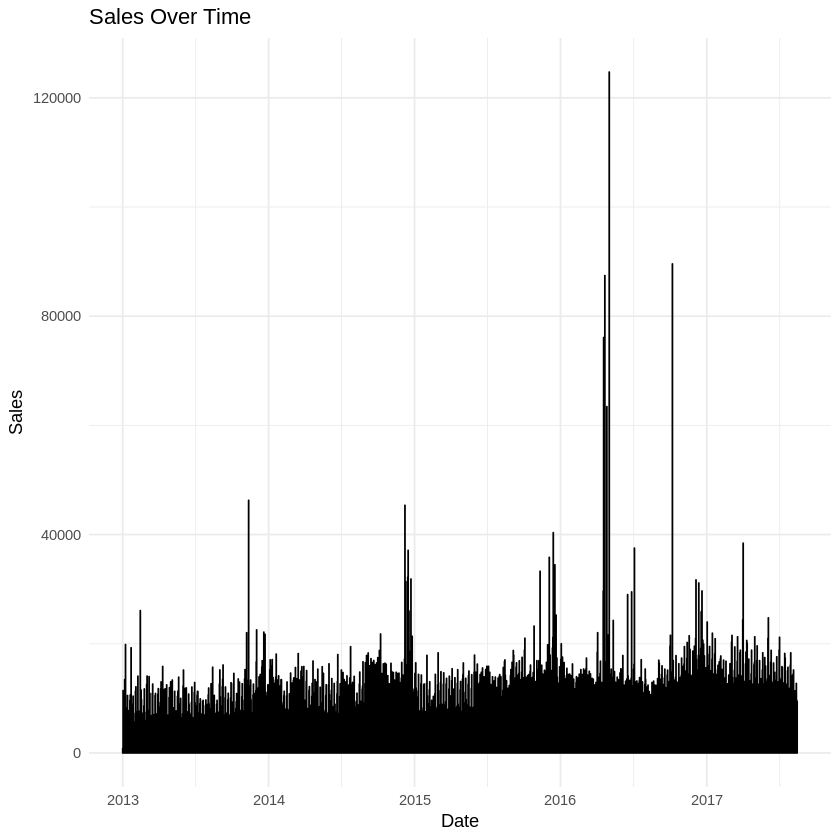

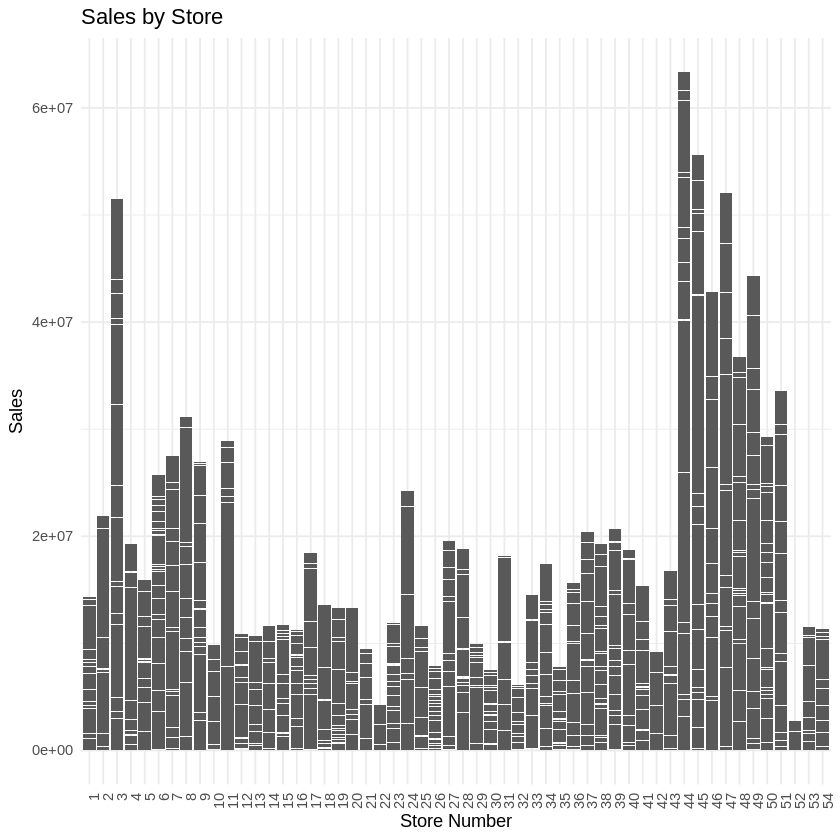

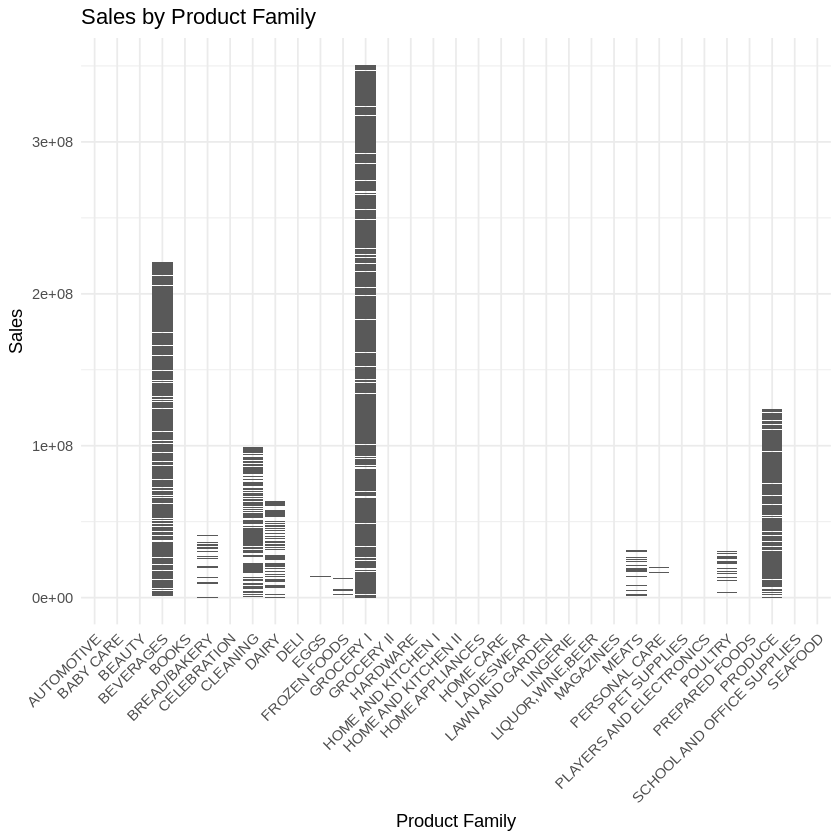

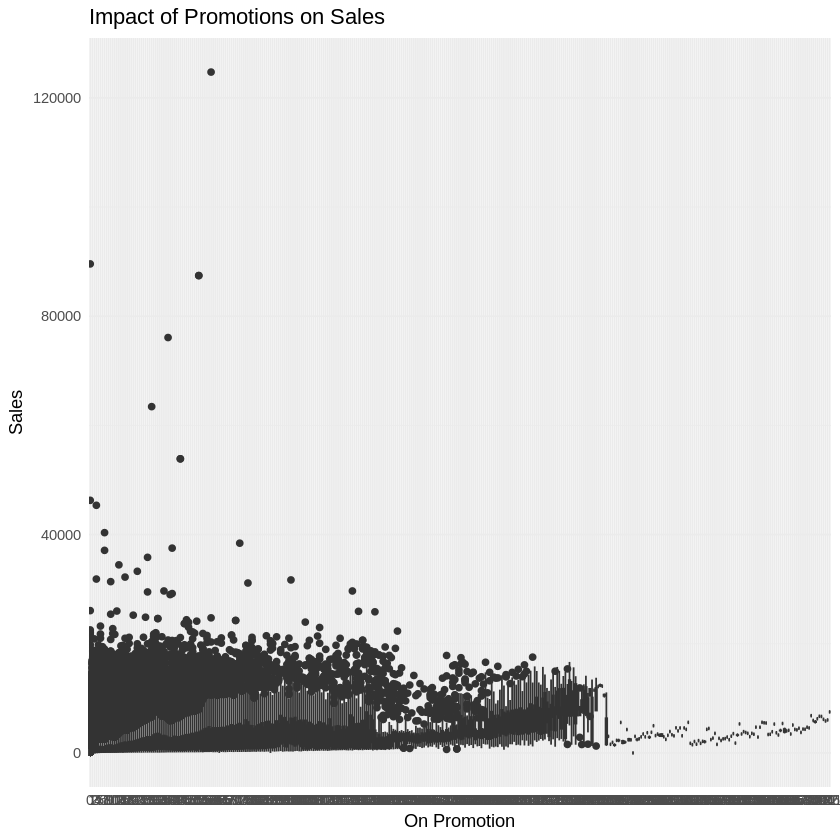

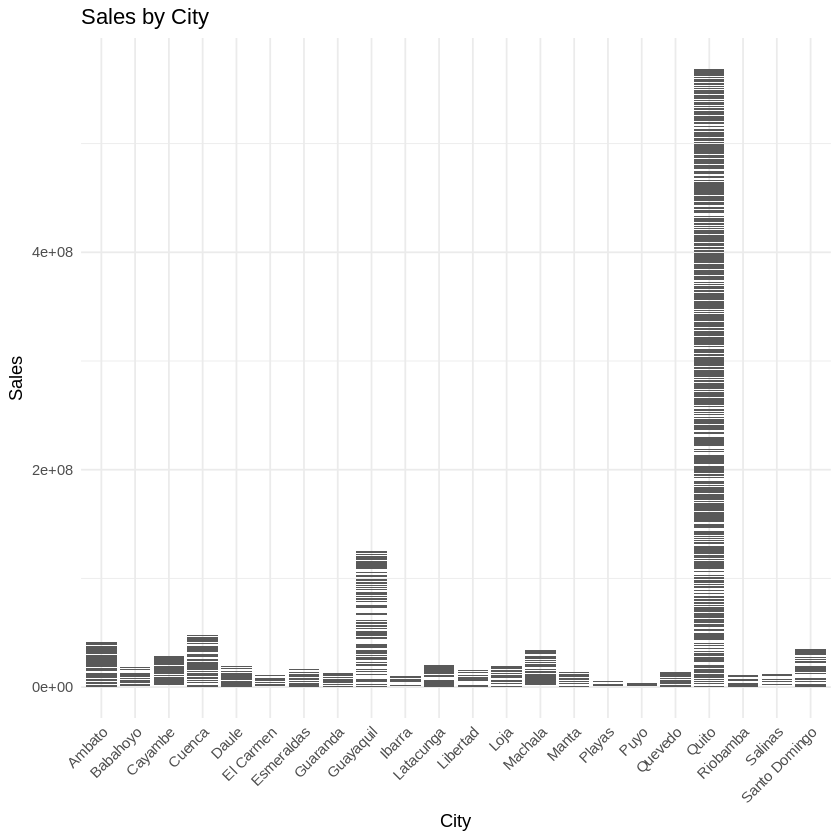

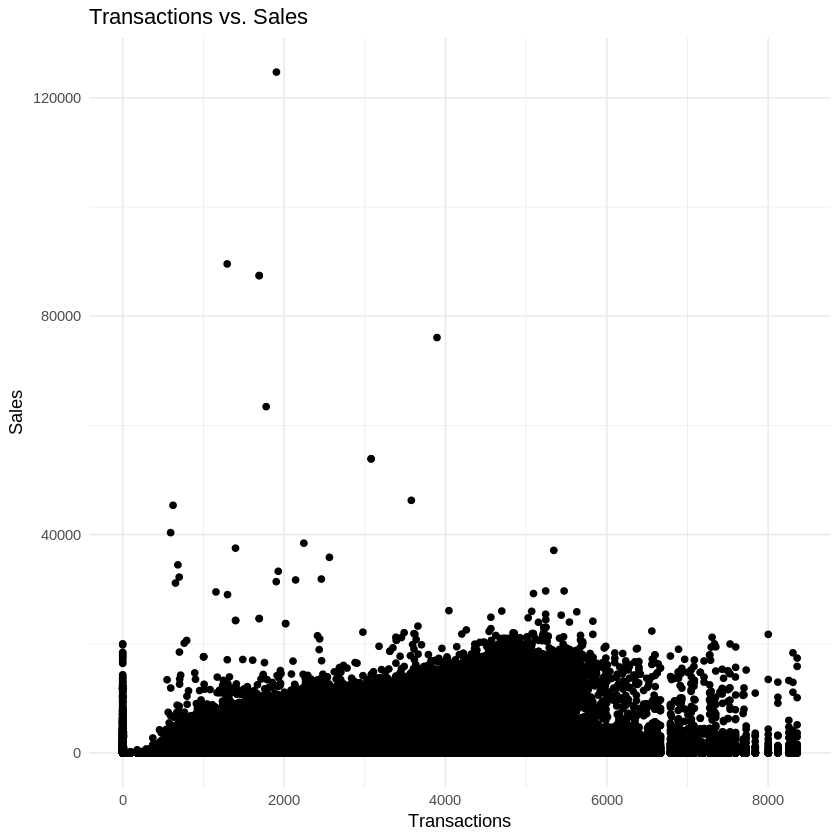

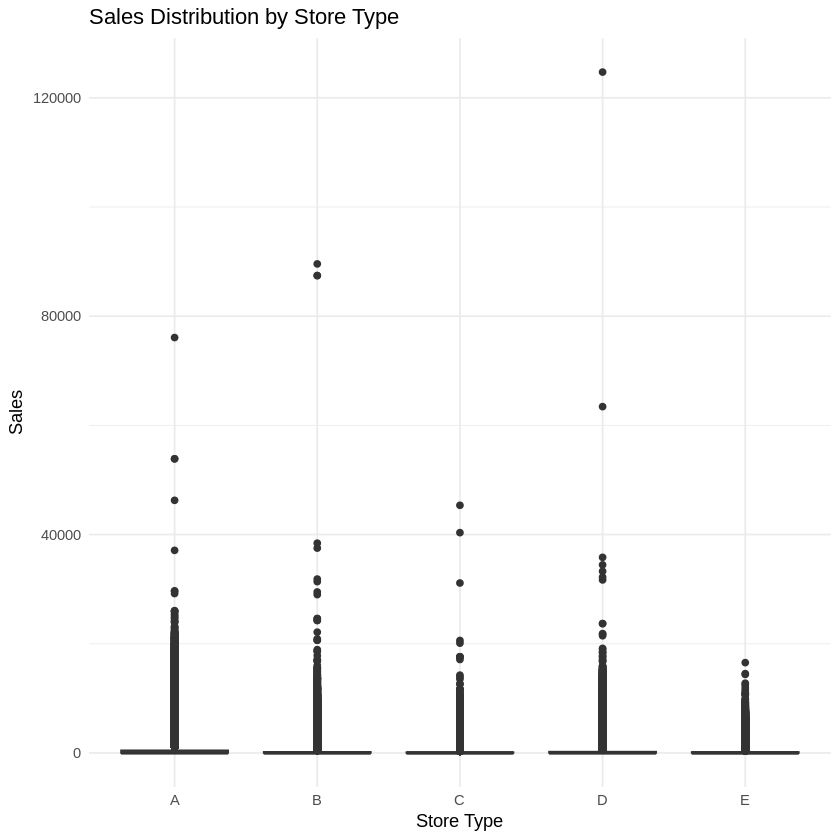

In [ ]:
# Load necessary libraries
library(ggplot2)
library(dplyr)

# Assuming processed_Df is your dataframe

# 1. Time Series Plot of Sales Over Time
ggplot(processed_df, aes(x = date, y = sales)) +
  geom_line() +
  labs(title = 'Sales Over Time', x = 'Date', y = 'Sales') +
  theme_minimal()

# 2. Sales by Store
ggplot(processed_df, aes(x = factor(store_nbr), y = sales)) +
  geom_bar(stat = "identity") +
  labs(title = 'Sales by Store', x = 'Store Number', y = 'Sales') +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

# 3. Sales by Product Family
ggplot(processed_df, aes(x = family, y = sales)) +
  geom_bar(stat = "identity") +
  labs(title = 'Sales by Product Family', x = 'Product Family', y = 'Sales') +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# 4. Impact of Promotions on Sales
ggplot(processed_df, aes(x = as.factor(onpromotion), y = sales)) +
  geom_boxplot() +
  labs(title = 'Impact of Promotions on Sales', x = 'On Promotion', y = 'Sales') +
  theme_minimal()

# 6. Sales by City
ggplot(processed_df, aes(x = city, y = sales)) +
  geom_bar(stat = "identity") +
  labs(title = 'Sales by City', x = 'City', y = 'Sales') +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# 7. Transactions vs. Sales
ggplot(processed_df, aes(x = transactions, y = sales)) +
  geom_point() +
  labs(title = 'Transactions vs. Sales', x = 'Transactions', y = 'Sales') +
  theme_minimal()

# 8. Sales Distribution by Store Type
ggplot(processed_df, aes(x = type.x, y = sales)) +
  geom_boxplot() +
  labs(title = 'Sales Distribution by Store Type', x = 'Store Type', y = 'Sales') +
  theme_minimal()


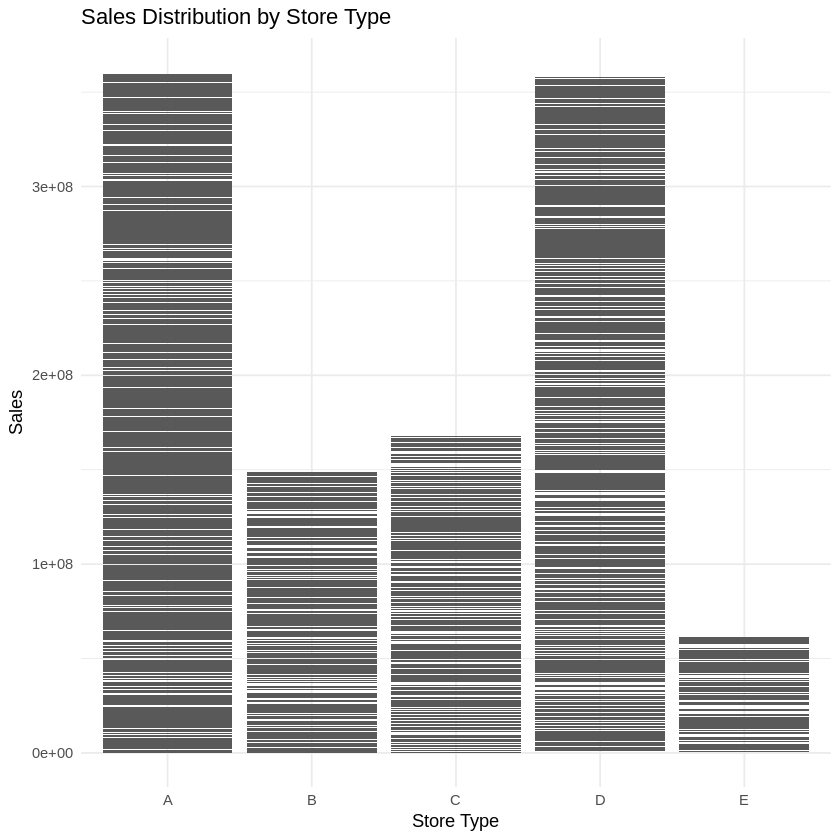

In [ ]:
ggplot(processed_df, aes(x = type.x, y = sales)) +
  geom_bar(stat = "identity") +  # Use stat = "identity" for raw data values
  labs(title = "Sales Distribution by Store Type", x = "Store Type", y = "Sales") +
  theme_minimal()

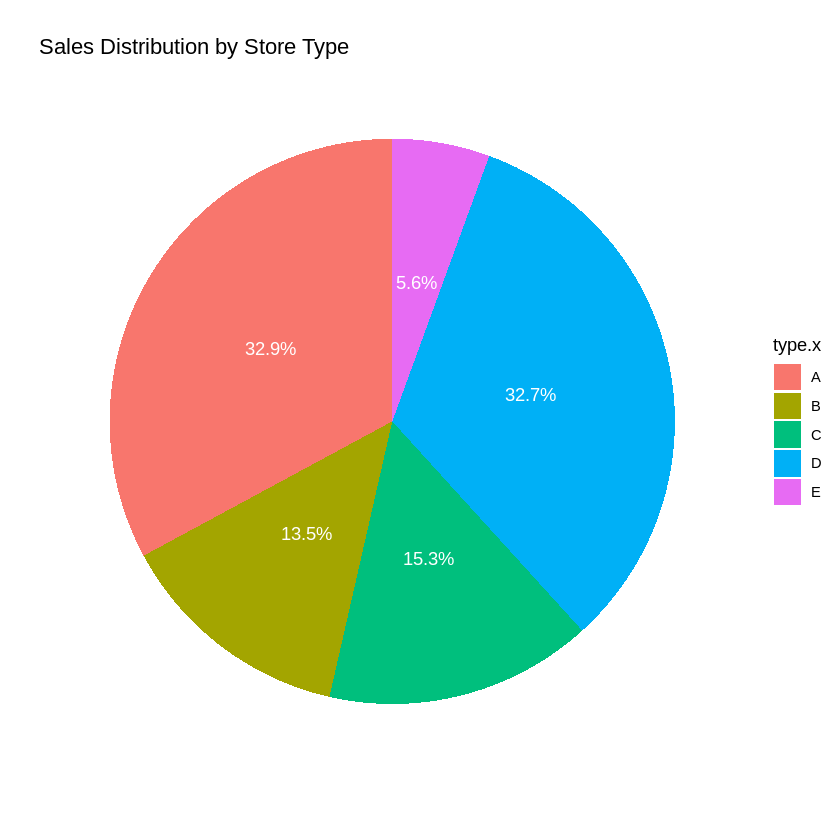

In [ ]:
# Load necessary libraries
library(ggplot2)
library(dplyr)

# Summarize data to get total sales by store type
summary_data <- processed_df %>%
  group_by(type.x) %>%
  summarise(total_sales = sum(sales, na.rm = TRUE))

# Add a column with the fraction of total sales for each store type
summary_data <- summary_data %>%
  mutate(fraction = total_sales / sum(total_sales))

# Add a column with the percentage of total sales for each store type
summary_data <- summary_data %>%
  mutate(percentage = fraction * 100)

# Add a column with the cumulative percentage for the pie chart
summary_data <- summary_data %>%
  arrange(desc(type.x)) %>%
  mutate(ypos = cumsum(fraction) - 0.5 * fraction)

# Create the pie chart
ggplot(summary_data, aes(x = "", y = fraction, fill = type.x)) +
  geom_bar(width = 1, stat = "identity") +
  coord_polar(theta = "y") +
  labs(title = 'Sales Distribution by Store Type', x = '', y = '') +
  theme_minimal() +
  theme(axis.text.x = element_blank(),
        axis.ticks = element_blank(),
        panel.grid = element_blank()) +
  geom_text(aes(y = ypos, label = paste0(round(percentage, 1), "%")), color = "white")


In [ ]:
# Load necessary libraries
library(dplyr)

# Assuming `df` is your dataframe with the mentioned features

# Define the threshold for considering categories
category_threshold <- 2

# List of categorical columns with more than `category_threshold` categories
columns_to_process <- c("date", "family", "city", "description")

# Apply one-hot encoding for columns with fewer categories
df_processed <- processed_df %>%
  mutate(across(all_of(columns_to_process), as.character),  # Convert to character type
         across(all_of(columns_to_process), factor),        # Convert to factor type
         across(all_of(columns_to_process), ~ifelse(n_distinct(.) >= category_threshold, ., "Other")),  # Group infrequent categories into "Other"
         across(all_of(columns_to_process), as.factor),     # Convert back to factor type
         across(all_of(columns_to_process), as.numeric))    # Convert factors to numeric (one-hot encoding)

# Now `df_processed` contains your dataframe with categorical variables handled appropriately


In [ ]:
#create_report(processed_df)

In [ ]:
# Split data into train and validation sets
set.seed(42)
train_indices <- sample(1:nrow(processed_df), 0.8 * nrow(processed_df))
train_data <- processed_df[train_indices, ]
validation_data <- processed_df[-train_indices, ]

In [ ]:
# Spliting Data for traing and testing
X_train <- train_data %>%
  dplyr::select(-c(date, sales)) %>%
  mutate(across(where(is.character), as.factor)) %>%
  mutate(across(where(is.factor), as.numeric))

y_train <- train_data$sales

X_val <- validation_data %>%
  dplyr::select(-c(date, sales)) %>%
  mutate(across(where(is.character), as.factor)) %>%
  mutate(across(where(is.factor), as.numeric))

y_val <- validation_data$sales

In [ ]:


# Train the Random Forest model
rf_model <- ranger(
  formula = y_train ~ .,          # Specify the target and predictors
  data = train_data,              # The combined data frame
  num.trees = 500,                # Number of trees
  mtry = floor(sqrt(ncol(X_train))), # Number of variables to split on
  importance = "impurity"         # Calculate variable importance
)


ERROR: Error: object 'train_data' not found


In [ ]:
# Feature Importance for Random Forest
rf_feature_importance <- importance(rf_model, type = 1)

In [ ]:
# Print Feature Importance for Random Forest
print("Random Forest Feature Importance:")
print(rf_feature_importance)

In [ ]:
# Plot Feature Importance for Random Forest
varImpPlot(rf_model)

In [ ]:
# Train a ranger random forest model with importance option
ranger_model <- ranger(y = y_train, x = X_train, num.trees = 500, importance = "impurity")

# Get variable importance
var_importance <- importance(ranger_model)

# Plot variable importance
plot(var_importance)

In [ ]:
# Install and load required packages
install.packages("party")
library(party)

# Train a conditional inference random forest model
cforest_model <- cforest(y_train ~ ., data = data.frame(X_train, y_train), controls = cforest_unbiased())

# Plot conditional variable importance
varimp_plot <- varimp(cforest_model)
plot(varimp_plot)

In [ ]:
# XGBoost Model
dtrain <- xgb.DMatrix(data = as.matrix(X_train), label = y_train)
dval <- xgb.DMatrix(data = as.matrix(X_val), label = y_val)

params <- list(
  objective = "reg:squarederror",
  eval_metric = "rmse"
)

xgb_model <- xgboost(params = params, data = dtrain, nrounds = 100)


In [ ]:
xgb_feature_importance <- xgb.importance(colnames(X_train), model = xgb_model)

# Print Feature Importance for XGBoost
print("XGBoost Feature Importance:")
print(xgb_feature_importance)
importance_matrix <- xgb.importance(colnames(X_train), model = xgb_model)
xgb.plot.importance(importance_matrix)

In [ ]:
# LSTM Model
X_train_matrix <- as.matrix(X_train)
X_val_matrix <- as.matrix(X_val)

lstm_model <- keras_model_sequential()
lstm_model %>%
  layer_lstm(units = 50, input_shape = c(ncol(X_train_matrix), 1)) %>%
  layer_dense(units = 1)

lstm_model %>% compile(
  loss = "mean_squared_error",
  optimizer = optimizer_adam(),
  metrics = c("mean_absolute_error")
)

X_train_reshaped <- array_reshape(X_train_matrix, c(nrow(X_train_matrix), ncol(X_train_matrix), 1))
X_val_reshaped <- array_reshape(X_val_matrix, c(nrow(X_val_matrix), ncol(X_val_matrix), 1))

history <- lstm_model %>% fit(
  X_train_reshaped, y_train,
  epochs = 50, batch_size = 32,
  validation_data = list(X_val_reshaped, y_val)
)

In [ ]:
# Get the output of the LSTM layer
lstm_layer_output <- predict(lstm_model, X_train_reshaped)

In [ ]:
# Plot activations of the LSTM layer
plot(lstm_layer_output)


In [ ]:
average_hidden_state <- rowMeans(lstm_layer_output)  # Calculate average across rows

# Plot the average hidden state
plot(average_hidden_state, type = "l",
     xlab = "Time Step",
     ylab = "Average Hidden State Value",
     main = "Average Hidden State Over Time")

In [ ]:
# SARIMA Model
sarima_model <- auto.arima(y_train)


In [ ]:
# Plot Autocorrelation and Partial Autocorrelation Functions
par(mfrow=c(1,2))
plot(acf_sales, main="Autocorrelation Function (ACF) of Sales")
plot(pacf_sales, main="Partial Autocorrelation Function (PACF) of Sales")

In [ ]:
install.packages("mlflow.sklearn")


In [ ]:
# Random Forest Predictions
predictions_rf <- predict(rf_model, X_val)

# XGBoost Predictions
predictions_xgb <- predict(xgb_model, dval)

# LSTM Predictions
predictions_lstm <- lstm_model %>% predict(X_val_reshaped)

# SARIMA Predictions
predictions_sarima <- forecast(sarima_model, h = nrow(validation_data))$mean

In [ ]:
signature <- list(input = "data.frame", output = "factor")
mlflow_log_model(
  model = model,
  artifact_path = "my_model",
  signature = signature,
  #conda_env = "conda.yaml"
)

In [ ]:
# Calculate Metrics for each model
mse_rf <- mean((predictions_rf - y_val)^2)
mse_xgb <- mean((predictions_xgb - y_val)^2)
mse_lstm <- mean((predictions_lstm - y_val)^2)


rmse_rf <- sqrt(mean((predictions_rf - y_val)^2))
rmse_xgb <- sqrt(mean((predictions_xgb - y_val)^2))
rmse_lstm <- sqrt(mean((predictions_lstm - y_val)^2))

mae_rf <- mean(abs(predictions_rf - y_val))
mae_xgb <- mean(abs(predictions_xgb - y_val))
mae_lstm <- mean(abs(predictions_lstm - y_val))

r_squared_rf <- 1 - (sum((y_val - predictions_rf)^2) / sum((y_val - mean(y_val))^2))
r_squared_xgb <- 1 - (sum((y_val - predictions_xgb)^2) / sum((y_val - mean(y_val))^2))
r_squared_lstm <- 1 - (sum((y_val - predictions_lstm)^2) / sum((y_val - mean(y_val))^2))


mse_sarima <- mean((predictions_sarima - y_val)^2)
rmse_sarima <- sqrt(mean((predictions_sarima - y_val)^2))
mae_sarima <- mean(abs(predictions_sarima - y_val))
r_squared_sarima <- 1 - (sum((y_val - predictions_sarima)^2) / sum((y_val - mean(y_val))^2))

In [ ]:
# Output the results
print("Random Forest Metrics:")
print(paste("MSE:", mse_rf))
print(paste("RMSE:", rmse_rf))
print(paste("MAE:", mae_rf))
print(paste("R-squared:", r_squared_rf))

print("XGBoost Metrics:")
print(paste("MSE:", mse_xgb))
print(paste("RMSE:", rmse_xgb))
print(paste("MAE:", mae_xgb))
print(paste("R-squared:", r_squared_xgb))

print("LSTM Metrics:")
print(paste("MSE:", mse_lstm))
print(paste("RMSE:", rmse_lstm))
print(paste("MAE:", mae_lstm))
print(paste("R-squared:", r_squared_lstm))

print("SARIMA Metrics:")
print(paste("MSE:", mse_sarima))
print(paste("RMSE:", rmse_sarima))
print(paste("MAE:", mae_sarima))
print(paste("R-squared:", r_squared_sarima))

In [ ]:
# Add SARIMA results to the summary table
summary_table <- data.frame(
  Model = c("Random-Forest", "XGBoost", "LSTM", "SARIMA"),
  MSE = c(mean((predictions_rf - y_val)^2), mean((predictions_xgb - y_val)^2), mean((predictions_lstm - y_val)^2), mse_sarima),
  RMSE = c(sqrt(mean((predictions_rf - y_val)^2)), sqrt(mean((predictions_xgb - y_val)^2)), sqrt(mean((predictions_lstm - y_val)^2)), rmse_sarima),
  MAE = c(mean(abs(predictions_rf - y_val)), mean(abs(predictions_xgb - y_val)), mean(abs(predictions_lstm - y_val)), mae_sarima),
  R_squared = c(1 - (sum((y_val - predictions_rf)^2) / sum((y_val - mean(y_val))^2)), 1 - (sum((y_val - predictions_xgb)^2) / sum((y_val - mean(y_val))^2)), 1 - (sum((y_val - predictions_lstm)^2) / sum((y_val - mean(y_val))^2)), r_squared_sarima)
)

# Print the summary table
print(summary_table)

In [ ]:
# Assuming you have already trained your models and have predictions available
# Import necessary libraries
library(ggplot2)

# Define function to calculate Mean Absolute Percentage Error (MAPE)
MAPE <- function(actual, predicted) {
  mean(abs((actual - predicted) / actual)) * 100
}

# Calculate accuracy metrics for each model
mape_rf <- MAPE(y_val, predictions_rf)
mape_xgb <- MAPE(y_val, predictions_xgb)
mape_lstm <- MAPE(y_val, predictions_lstm)
mape_sarima <- MAPE(y_val, sarima_forecast)

# Define summary table
summary_table <- data.frame(
  Model = c("Random-Forest", "XGBoost", "LSTM", "SARIMA"),
  MSE = c(mean((predictions_rf - y_val)^2), mean((predictions_xgb - y_val)^2), mean((predictions_lstm - y_val)^2), mse_sarima),
  RMSE = c(sqrt(mean((predictions_rf - y_val)^2)), sqrt(mean((predictions_xgb - y_val)^2)), sqrt(mean((predictions_lstm - y_val)^2)), rmse_sarima),
  MAE = c(mean(abs(predictions_rf - y_val)), mean(abs(predictions_xgb - y_val)), mean(abs(predictions_lstm - y_val)), mae_sarima),
  R_squared = c(1 - (sum((y_val - predictions_rf)^2) / sum((y_val - mean(y_val))^2)), 1 - (sum((y_val - predictions_xgb)^2) / sum((y_val - mean(y_val))^2)), 1 - (sum((y_val - predictions_lstm)^2) / sum((y_val - mean(y_val))^2)), r_squared_sarima),
  MAPE = c(mape_rf, mape_xgb, mape_lstm, mape_sarima)
)

# Print summary table
print(summary_table)

# Create a bar plot of accuracy metrics for each model
accuracy_data <- data.frame(
  Model = rep(summary_table$Model, 5),
  Metric = c(rep("MSE", 4), rep("RMSE", 4), rep("MAE", 4), rep("R_squared", 4), rep("MAPE", 4)),
  Value = c(summary_table$MSE, summary_table$RMSE, summary_table$MAE, summary_table$R_squared, summary_table$MAPE)
)

accuracy_plot <- ggplot(accuracy_data, aes(x = Model, y = Value, fill = Metric)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Model Accuracy Metrics", y = "Value") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

print(accuracy_plot)


In [ ]:
# Plot showing values for all models
par(mfrow=c(2,2))
barplot(summary_table$MSE, main="Mean Squared Error", names.arg=summary_table$Model, col="lightblue")
barplot(summary_table$RMSE, main="Root Mean Squared Error", names.arg=summary_table$Model, col="lightgreen")
barplot(summary_table$MAE, main="Mean Absolute Error", names.arg=summary_table$Model, col="lightcoral")
barplot(summary_table$R_squared, main="R-squared", names.arg=summary_table$Model, col="lightgray")

In [ ]:
# Plotting predicted vs actual values for all models
par(mfrow=c(2, 2))

In [ ]:
# Random Forest
plot(y_val, predictions_rf, main = "Random Forest Predictions", xlab = "Actual Sales", ylab = "Predicted Sales", col = "blue")
abline(0, 1, col = "red")

# XGBoost
plot(y_val, predictions_xgb, main = "XGBoost Predictions", xlab = "Actual Sales", ylab = "Predicted Sales", col = "green")
abline(0, 1, col = "red")

# LSTM
plot(y_val, predictions_lstm, main = "LSTM Predictions", xlab = "Actual Sales", ylab = "Predicted Sales", col = "purple")
abline(0, 1, col = "red")

# SARIMA
plot(y_val, predictions_sarima, main = "SARIMA Predictions", xlab = "Actual Sales", ylab = "Predicted Sales", col = "orange")
abline(0, 1, col = "red")

In [ ]:




# Create a summary table for all models
#summary_table <- data.frame(
#  Model = c("Random Forest", "XGBoost", "LSTM"),
#  MSE = c(mse_rf, mse_xgb, mse_lstm),
#  RMSE = c(rmse_rf, rmse_xgb, rmse_lstm),
#  MAE = c(mae_rf, mae_xgb, mae_lstm),
#  R_squared = c(r_squared_rf, r_squared_xgb, r_squared_lstm)
#)

# Output SARIMA Metrics



# Plot histograms for SARIMA predictions
#hist(predictions_sarima, main = "SARIMA Predictions", xlab = "Predicted Sales", col = "lightblue")

In [ ]:
if (!requireNamespace("e1071", quietly = TRUE)) {
  install.packages("e1071")  # Install the package if not already installed
} else {
  # If package is installed, print its version
  package_version <- packageVersion("e1071")
  print(paste("e1071 package version:", package_version))
}